# K-truss implementation following https://arxiv.org/abs/1205.6693


See in the paper : Algorithm 2 : Improved Truss Decomposition (p 815)

In [23]:
import networkx as nx
from networkx import common_neighbors
import numpy as np 
from collections import OrderedDict
import matplotlib.pyplot as plt

In [56]:
## In the article, p 813, synthetic data are given with output of the k-truss, in order to evaluate the code. 
## We will then check our code with this Grap.
G=nx.Graph()
G.add_edges_from([(12,17),(12,21),(6,21),(4,17),(4,21),(3,21),(20,21),(15,10),(19,10),(19,18),(19,5),(19,15),(5,10),(4,1),
                  (4,18),(3,18),(20,18),
                 (15,18),(5,18),(5,13),(13,18),(4,8),(4,10),(3,10),(20,15),(15,19),(10,8),(10,16),(10,18),
                  (16,18),(16,1),(21,17),(21,2),(21,7),(18,1),(21,14),(21,18),(21,8),(17,7),(7,11),(2,7),(7,14),
                  (14,18),(7,18),(18,8),(9,18)])

k=3


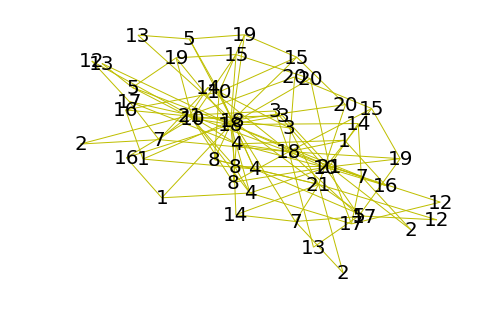

k=4


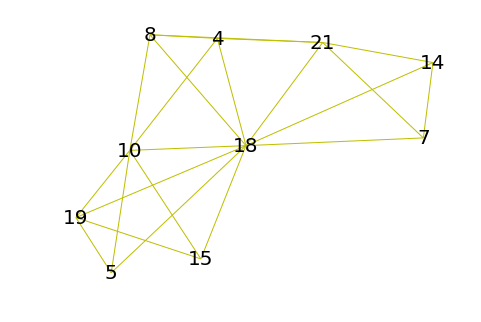

In [58]:
# COMPUTE THE SUPPORT OF H

def compute_sup_e(H):
    dict_res={}
    edges_sorted={}
    edges=H.edges
    for e in edges:
        edges_sorted[e]=len(list(common_neighbors(H, e[0], e[1])))
    edges_sorted=sorted(edges_sorted.items(), key=lambda x: x[1])
    return(OrderedDict(edges_sorted))

# SORT THE SUPPORT OF THE EDGES IN H FOR OPTIMIZATION

def dict_to_sorted_dict(dictionnary):
    return(OrderedDict(sorted(dictionnary.items(), key=lambda x: x[1])))

# K-truss of G

## INPUT :
## if output_for_density=True, the output : "output_densityé will be a list of list containing
## informations necessary to run the inflexion and density methods available in the "K-core corpus" script 

## OUTPUT : 
## k_truss_nodes is the k_truss value for each node in the graph
## K is the maximum k such that the k-truss of G is not empty
## G_bis is the maximum non K_truss subgraph of G
## output_density is a list of list :[[1,nb_nodes of the 1-subgraph of G,nb_edges of the 1-sub of G]...,
##[k_max,nb_nodes of the k_max-subgraph of G,nb_edges of the k_max-sub of G]]

def k_truss_True_Dec_Massive_Net(G,output_for_density=True):
    edges_sorted=compute_sup_e(G)
    k_truss_nodes={}
    for node in G.nodes:
        k_truss_nodes[node]=0
    not_all_edges_removed=True
    edges_sorted=compute_sup_e(G)
    k=2
    liste_remove=[]
    output_density=[[k,len(G.nodes()),len(G.edges)]]
    while (not_all_edges_removed):
        liste_remove_k=[]
        while(list(edges_sorted.values())[0]<=k-2):
            e=list(edges_sorted.keys())[0]
            node1=list(edges_sorted.keys())[0][0]
            node2=list(edges_sorted.keys())[0][1]
            nb_u=G.neighbors(node1)
            nb_v=G.neighbors(node2)
            nbU=list(nb_v)
            u=node2
            v=node1
            if (len(list(nb_u))<len(list(nb_v))) :
                nbU=list(nb_u)
                u=node1
                v=node2
            for w in nbU:
                if(G.has_edge(w,v)):
                    sup_keys=edges_sorted.keys()
                    if((v,w) in sup_keys):
                        edges_sorted[(v,w)]-=1
                    else:
                        edges_sorted[(w,v)]-=1
                    if((u,w) in sup_keys):
                        edges_sorted[(u,w)]-=1
                    else:
                        edges_sorted[(w,u)]-=1
                    edges_sorted=dict_to_sorted_dict(edges_sorted)
            del(edges_sorted[e])
            liste_remove_k.append(e)
            G.remove_edge(e[0],e[1])
            if(len(G.edges)==0):
                break
        liste_remove.append(liste_remove_k)
        
        if(len(list(edges_sorted.keys()))==0):
            not_all_edges_removed=False
            k=k-1
        else:
            k+=1            
            G_bis=max(nx.connected_component_subgraphs(G),key=len)
            for node_not_removed in G_bis.nodes:
                k_truss_nodes[node_not_removed]+=1
            if(output_for_density):
                output_density.append([k,len(list(G_bis.nodes)),len(G_bis.edges)]) 

            nx.draw(G_bis, with_labels=True,font_color='k',node_color='g',edge_color='y',font_size=max(min(20,500/len(G_bis.nodes)),9),width=1,node_size=0,label='Graph Unweighted GOT')
            print('k={}'.format(k))
            plt.savefig("K_truss_max_subgraph°{}.png".format(k-2))
            plt.show()
            
    return(k_truss_nodes,k,G_bis,output_density)
k_truss_nodes,k,G_bis,output_density=k_truss_True_Dec_Massive_Net(G.copy(),output_for_density=True)

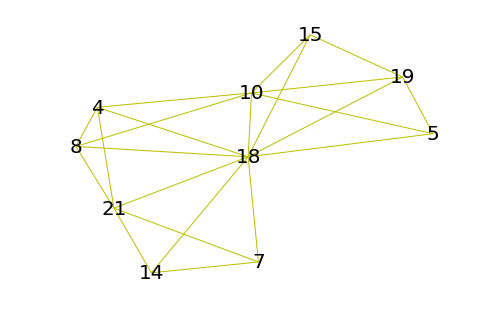

In [60]:
#GIVE THE K_MAX_TRUSS SUBGRAPH 
# INPUT : a nx Graph G, the k of the k_subgraph needed
# OUTPUT : the nx k_subgraph, a png containing the k_subgraph, and a plot of the k_subgraph
# k has to be >= 2 
def get_k_truss_subgraph(G,k_max):
    edges_sorted=compute_sup_e(G)
    k_truss_nodes={}
    for node in G.nodes:
        k_truss_nodes[node]=0
    not_all_edges_removed=True
    edges_sorted=compute_sup_e(G)
    k=2
    liste_remove=[]
    while (not_all_edges_removed):
        liste_remove_k=[]
        while(list(edges_sorted.values())[0]<=k-2):
            e=list(edges_sorted.keys())[0]
            node1=list(edges_sorted.keys())[0][0]
            node2=list(edges_sorted.keys())[0][1]
            nb_u=G.neighbors(node1)
            nb_v=G.neighbors(node2)
            nbU=list(nb_v)
            u=node2
            v=node1
            if (len(list(nb_u))<len(list(nb_v))) :
                nbU=list(nb_u)
                u=node1
                v=node2
            for w in nbU:
                if(G.has_edge(w,v)):
                    sup_keys=edges_sorted.keys()
                    if((v,w) in sup_keys):
                        edges_sorted[(v,w)]-=1
                    else:
                        edges_sorted[(w,v)]-=1
                    if((u,w) in sup_keys):
                        edges_sorted[(u,w)]-=1
                    else:
                        edges_sorted[(w,u)]-=1
                    edges_sorted=dict_to_sorted_dict(edges_sorted)
            del(edges_sorted[e])
            liste_remove_k.append(e)
            G.remove_edge(e[0],e[1])
            if(len(G.edges)==0):
                break
        liste_remove.append(liste_remove_k) 
        if(len(list(edges_sorted.keys()))==0):
            not_all_edges_removed=False
            k=k-1
            plt.figure
            nx.draw(G_bis, with_labels=True,font_color='k',node_color='g',edge_color='y',font_size=max(min(20,500/len(G_bis.nodes)),9),width=1,node_size=0,label='Graph Unweighted GOT')
            plt.savefig("{}_subgraph.png".format(k))
            plt.show()  
            return(G_bis)
        elif(k_max==k):
            G_bis=max(nx.connected_component_subgraphs(G),key=len)
            nx.draw(G_bis, with_labels=True,font_color='k',node_color='g',edge_color='y',font_size=max(min(20,500/len(G_bis.nodes)),9),width=1,node_size=0,label='Graph Unweighted GOT')
            plt.savefig("{}_subgraph.png".format(k))
            plt.show() 
            return(G_bis)
        else:
            k+=1            
            G_bis=max(nx.connected_component_subgraphs(G),key=len)
            for node_not_removed in G_bis.nodes:
                k_truss_nodes[node_not_removed]+=1      
k_max=4
k_truss_subgraph=get_k_truss_subgraph(G.copy(),k_max)

In [63]:
k_truss_subgraph.nodes

NodeView((21, 4, 15, 10, 19, 18, 5, 8, 7, 14))

In [64]:
k_truss_subgraph.edges

EdgeView([(21, 4), (21, 7), (21, 14), (21, 18), (21, 8), (4, 18), (4, 8), (4, 10), (15, 10), (15, 19), (15, 18), (10, 19), (10, 5), (10, 8), (10, 18), (19, 18), (19, 5), (18, 5), (18, 14), (18, 7), (18, 8), (7, 14)])